In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

 ### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока). 

In [103]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [104]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [105]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [106]:
X_st = X.copy().astype(np.float64)
for i in range(1, len(X)):
    X_st[i] = calc_std_feat(X[i])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [107]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [108]:
# L2 регуляризация - Ridge
# f(x, W) + (lambda_/2) * np.sum(W**2)

In [109]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [110]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

In [111]:
W = eval_model_reg2(X_st, y, iterations=10000, alpha=1e-2, lambda_=1e-4)

10000 [57.39713014  6.12122639  1.42979593  4.116002  ] 39.77775461636001


In [112]:
W

array([57.39713014,  6.12122639,  1.42979593,  4.116002  ])

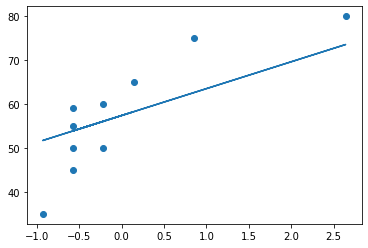

In [113]:
plt.scatter(X_st[1], y)
plt.plot(X_st[1], W[0] + W[1]* X_st[1])
plt.show()

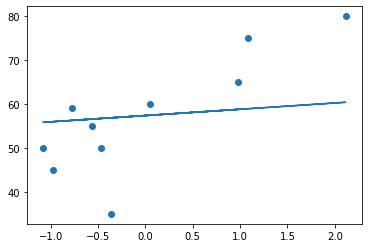

In [114]:
plt.scatter(X_st[2], y)
plt.plot(X_st[2], W[0] + W[2]* X_st[2])
plt.show()

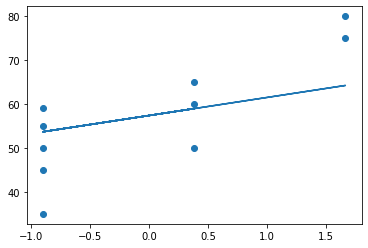

In [115]:
plt.scatter(X_st[3], y)
plt.plot(X_st[3], W[0] + W[3]* X_st[3])
plt.show()

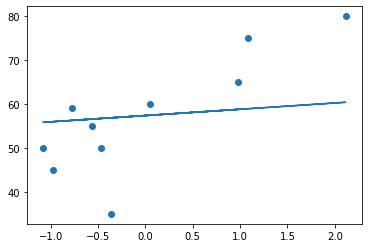

In [116]:
plt.scatter(X_st[2], y)
plt.plot(X_st[2], W[0] + W[2]* X_st[2])
plt.show()

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Да, можно

### 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [117]:
# L1 регуляризация - Lasso

In [118]:
# f(x, W) + (lambda_/2) * np.sum(np.abs(W))
# производная (lambda_ * W) / (2 *(np.abs(W))

In [119]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + (lambda_ * W) / (2 * np.abs(W)))
        
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W

In [120]:
eval_model_reg1(X_st, y, iterations=10000, alpha=1e-2, lambda_=1e-4)

10000 [57.399975    6.12240511  1.42845931  4.11636063] 39.777746036861394


array([57.399975  ,  6.12240511,  1.42845931,  4.11636063])